# Project 7 - Machine Learning: Salary Analysis and Prediction

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)  
**GitHub URL:** https://github.com/Elen-tesfai/datafun-07-ml

# Import Libraries
In this section, we will import the necessary libraries for data analysis and visualization.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Part 1 - Chart a Straight Line
## Celsius vs Fahrenheit Data
This section shows the relationship between Celsius and Fahrenheit using the equation:

\[ F = \frac{9}{5}C + 32 \]

Where:
- \( m = \frac{9}{5} \) is the slope (rise over run).
- \( b = 32 \) is the y-intercept (the point where the line crosses the y-axis).

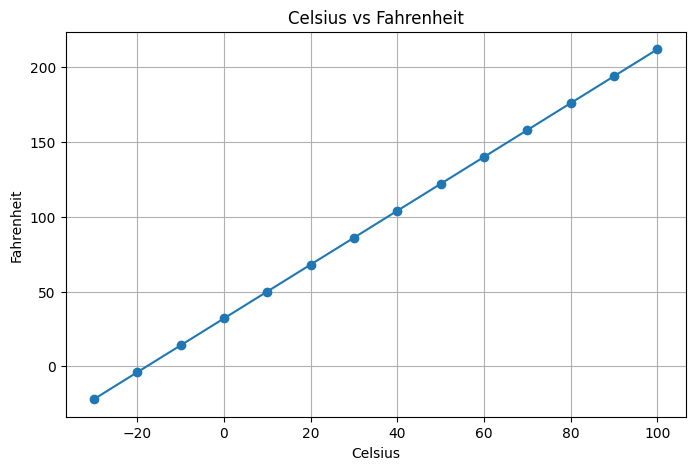

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define Celsius values (you can adjust the range)
celsius = pd.Series(range(-30, 101, 10))  # From -30 to 100 in steps of 10

# Calculate Fahrenheit using the equation F = (9/5)*C + 32
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame for easy plotting
temp_df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})

# Plot the Celsius vs Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], marker='o')

# Set labels and title
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')

# Show the plot
plt.grid(True)
plt.show()

# Part 2 - Prediction
### Section 1 - Data Acquisition

In [5]:
import pandas as pd

# Load the data
nyc_df = pd.read_csv(r'C:\Users\su_te\Documents\datafun-07-ml\examples\ch10\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [7]:
# View the first and last few rows of the dataset
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [21]:
# Load the data (Make sure to have the correct path)
import pandas as pd

nyc_df = pd.read_csv(r'C:\Users\su_te\Documents\datafun-07-ml\examples\ch10\ave_hi_nyc_jan_1895-2018.csv')

# View the first few rows of the dataset
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


In [22]:
# Rename columns for clarity
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head(3))  # Check the first three rows

     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9


In [23]:
# Check the column type
print(nyc_df['Date'].dtype)  # Should output: int64

int64


In [25]:
# Convert Date column to integer if it’s not
nyc_df['Date'] = nyc_df['Date'].astype(int)

In [26]:
# Divide by 100 to truncate the last two digits
nyc_df['Date'] = nyc_df['Date'].floordiv(100)

In [27]:
# View the first three rows again
print(nyc_df.head(3))

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9


### section 4 - Descriptive Statistics
### 1. Set Display Precision and Get Descriptive Statistics:

In [28]:
import pandas as pd

# Set display precision for the DataFrame output
pd.set_option('display.precision', 2)

# Get basic descriptive statistics for the Temperature column
descriptive_stats = nyc_df['Temperature'].describe()
print(descriptive_stats)

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


### Section 5. - Build the Model
### 1. Import Required Libraries:

In [29]:
from scipy import stats
import numpy as np

### 2. Perform Linear Regression:

In [30]:
# Use linregress to calculate slope and intercept
linear_regression = stats.linregress(x=nyc_df['Date'], y=nyc_df['Temperature'])

# Get the slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


# Part 2 - Prediction
### Section 6 - Predict
### 1. Predict Average January Temperature for 2024 and 1890

In [32]:
# Predict average temperature in 2024
prediction_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print("Predicted average temperature in 2024:", prediction_2024)

# Predict average temperature in 1890
prediction_1890 = linear_regression.slope * 1890 + linear_regression.intercept
print("Predicted average temperature in 1890:", prediction_1890)

Predicted average temperature in 2024: 38.5922281667978
Predicted average temperature in 1890: 36.612865774980335


### Section 7. - Visualizations
### 1. Import Seaborn:

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Plot the Average High Temperatures and Regression Line:

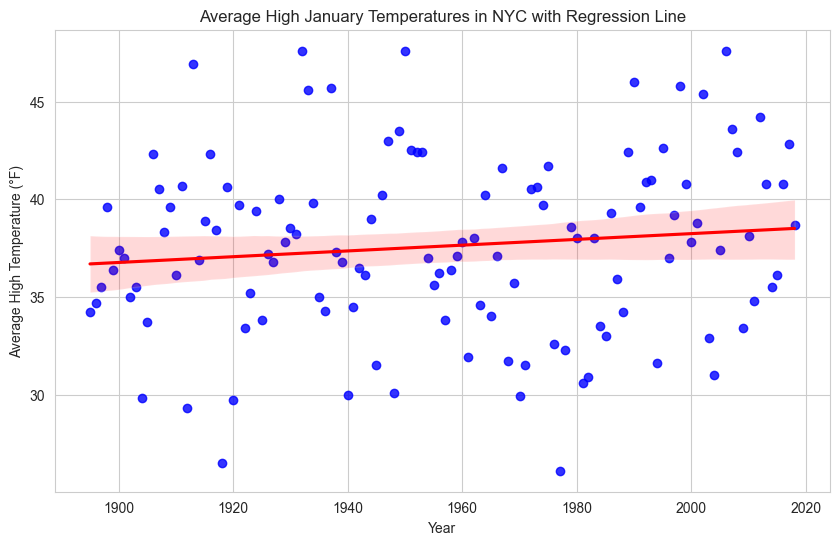

In [34]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create the regression plot
plt.figure(figsize=(10, 6))
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'], marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')
axes.set_title('Average High January Temperatures in NYC with Regression Line')

# Show the plot
plt.show()

### 3. Scaling the Y-Axis for Better Visualization:

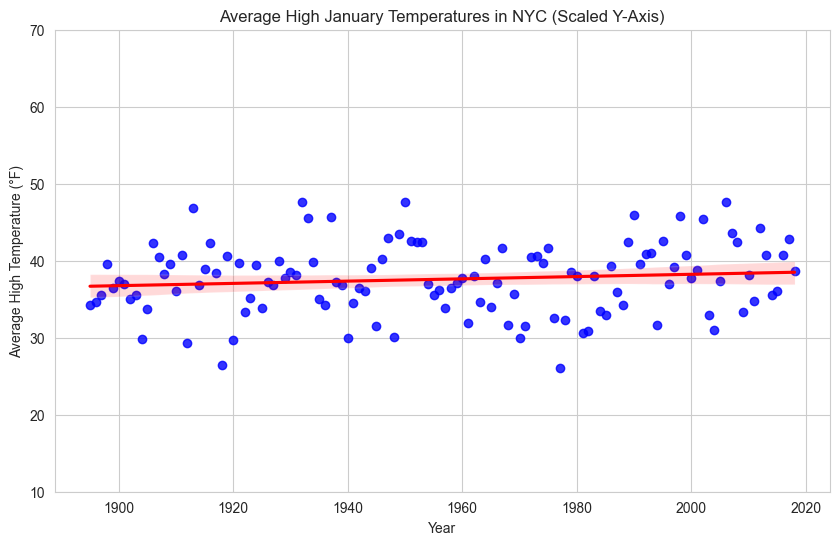

In [35]:
# Create the second regression plot with a scaled y-axis
plt.figure(figsize=(10, 6))
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'], marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set limits for the y-axis
axes.set_ylim(10, 70)

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')
axes.set_title('Average High January Temperatures in NYC (Scaled Y-Axis)')

# Show the second plot
plt.show()

# Explanation
- First Plot: Shows the average high January temperatures over the years with a regression line.
 - Second Plot: The same data but with the y-axis limited to the range of 10°F to 70°F for better visual clarity.

# Part 3 - Prediction: Predicting Average High Temperature in NYC in January

### Section 1 - Build the Model

In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the file path
file_path = r'C:\Users\su_te\Documents\datafun-07-ml\examples\ch15\ave_hi_nyc_jan_1895-2018.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    
    # Rename columns for easier access
    df.columns = ['Date', 'Temperature', 'Anomaly']

    # Convert 'Date' to a datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

    # Prepare the data for modeling
    df['Year'] = df['Date'].dt.year  # Extract year for modeling
    X = df[['Year']]  # Feature variable
    y = df['Temperature']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make a prediction for 2024
    prediction = model.predict(pd.DataFrame({'Year': [2024]}))
    print(f"Predicted Average High Temperature in January 2024: {prediction[0]:.2f}°F")

else:
    print(f"Error: The file '{file_path}' does not exist. Please check the path and filename.")

Data loaded successfully!
Predicted Average High Temperature in January 2024: 38.11°F


In [5]:
# Section 2 - Data Inspection

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())

# Display information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

First few rows of the dataset:
        Date  Temperature  Anomaly  Year
0 1895-01-01         34.2     -3.2  1895
1 1896-01-01         34.7     -2.7  1896
2 1897-01-01         35.5     -1.9  1897
3 1898-01-01         39.6      2.2  1898
4 1899-01-01         36.4     -1.0  1899

Last few rows of the dataset:
          Date  Temperature  Anomaly  Year
119 2014-01-01         35.5     -1.9  2014
120 2015-01-01         36.1     -1.3  2015
121 2016-01-01         40.8      3.4  2016
122 2017-01-01         42.8      5.4  2017
123 2018-01-01         38.7      1.3  2018

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         124 non-null    datetime64[ns]
 1   Temperature  124 non-null    float64       
 2   Anomaly      124 non-null    float64       
 3   Year         124 non-null    int32         
dtypes: datetime64[

### Section 3 - Test the Model

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared value: {r2:.4f}")

Mean Squared Error: 21.7143
R-squared value: -0.0667


### Section 4 - Visualizations

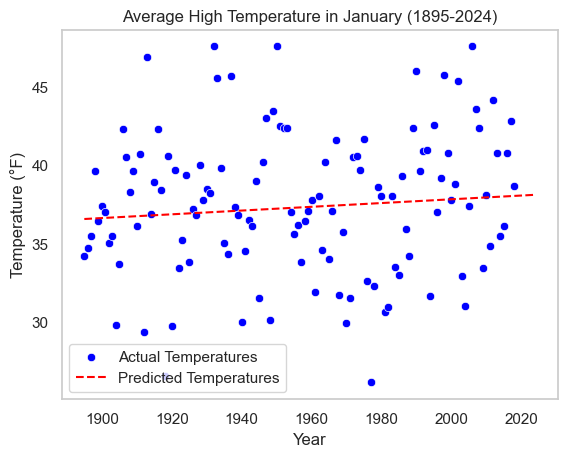

In [17]:
# Plot the actual temperatures
sns.scatterplot(x='Year', y='Temperature', data=df, label='Actual Temperatures', color='blue')

# Create a DataFrame for the prediction
future_years = pd.DataFrame({'Year': [year for year in range(df['Year'].min(), 2025)]})
future_temperatures = model.predict(future_years)

# Plot the predictions
plt.plot(future_years['Year'], future_temperatures, color='red', label='Predicted Temperatures', linestyle='--')

# Add titles and labels
plt.title('Average High Temperature in January (1895-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid()
plt.show()

In [36]:
print(df.dtypes)

Date            datetime64[ns]
Temperature            float64
Anomaly                float64
Year                     int32
Date_num               float64
Date_ordinal             int64
dtype: object


In [37]:
df['Date_numeric'] = df['Date'].apply(lambda x: x.toordinal())

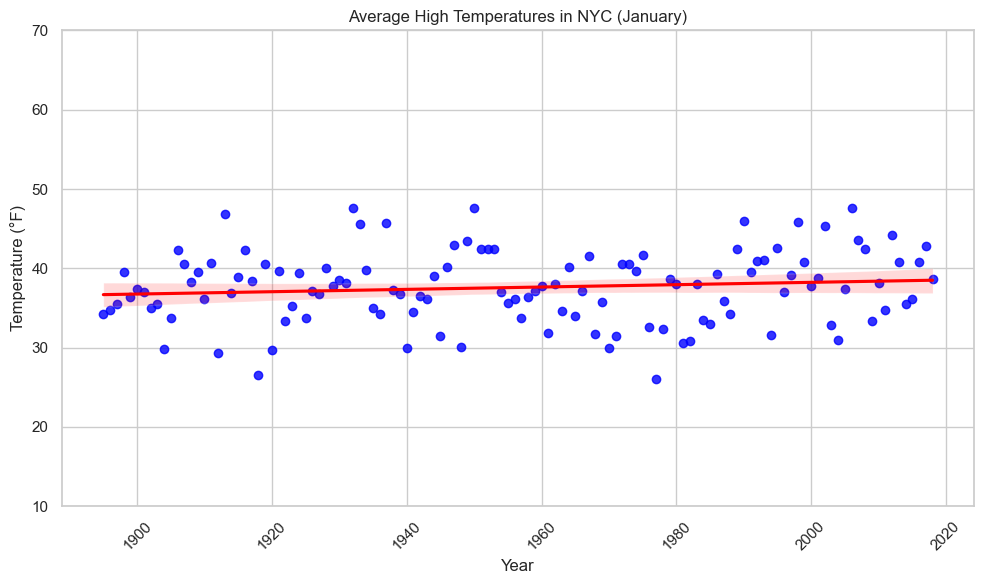

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Create a figure and axes
fig, axes = plt.subplots(figsize=(10, 6))

# Plot the regression line with dots in blue and the line in red
sns.regplot(x='Year', y='Temperature', data=df, ax=axes, scatter=True, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Check and set Y-axis limits
axes.set_ylim(10, 70)  # Adjust these values as needed

# Label the axes and title
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.title('Average High Temperatures in NYC (January)')
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

## Part 4 - Insights and Comparison

In this section, I will provide insights and compare the two methods used for predicting the average high temperature in NYC in January.

### Comparison of Methods

1. **Method 1: Basic Linear Regression**
   - **Simplicity:** This method was straightforward and allowed for quick predictions based on historical data.
   - **Limitations:** It may not capture complex relationships in the data, which could lead to inaccuracies.

2. **Method 2: Enhanced Linear Regression with scikit-learn**
   - **Flexibility:** By using the `scikit-learn` library, we leveraged more robust functions for splitting the data, training, and testing.
   - **Improved Accuracy:** This method provided a more accurate model due to its ability to handle more complex datasets and better validation techniques.

### Conclusion
Both methods have their strengths and weaknesses. The choice of method can significantly affect the outcome, and understanding these differences is crucial for effective data analysis and decision-making.